In [6]:
from __future__ import absolute_import,division,print_function,unicode_literals
#importing the necessary libraries and dependencies
import pandas as pd
import numpy as np
import seaborn as sns;
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd


In [7]:
data = pd.read_csv('Location\Alipur\cleaned_data.csv')
# Convert the date column to datetime
data['From Date'] = data['From Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
data['To Date'] = data['To Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
data['From Date'].min(), data['From Date'].max()
data.info()
aq_df = data.set_index('To Date')
aq_df.drop(['From Date'], axis=1, inplace=True)
aq_df.drop(['TOT-RF','Xylene','Benzene'], axis=1, inplace=True)
aq_df.dropna(inplace=True)
# target is Ozone


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   From Date  1599 non-null   datetime64[ns]
 1   To Date    1599 non-null   datetime64[ns]
 2   PM2.5      1579 non-null   float64       
 3   PM10       1583 non-null   float64       
 4   NO         1582 non-null   float64       
 5   NO2        1582 non-null   float64       
 6   Nox        1582 non-null   float64       
 7   NH3        1567 non-null   float64       
 8   SO2        1566 non-null   float64       
 9   CO         1580 non-null   float64       
 10  Ozone      1538 non-null   float64       
 11  Benzene    1484 non-null   float64       
 12  Toluene    1484 non-null   float64       
 13  RH         1583 non-null   float64       
 14  WD         1583 non-null   float64       
 15  SR         1583 non-null   float64       
 16  BP         1582 non-null   float64       


In [11]:
aq_df.head()

,PM2.5,PM10,NO,NO2,Nox,NH3,SO2,CO,Ozone,Toluene,RH,WD,SR,BP,AT
To Date,,,,,,,,,,,,,,,
2018-11-12,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,39.13,17.96,76.73,240.05,29.55,992.08,19.86
2018-11-13,235.81,340.70,4.97,80.06,46.58,35.29,13.32,1.54,44.63,13.94,77.34,244.45,107.99,990.39,19.82
2018-11-14,285.09,428.91,16.67,111.32,72.80,41.51,21.87,1.34,31.22,43.54,78.66,219.97,77.29,988.21,20.48
2018-11-15,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1.00,41.93,28.66,77.86,214.38,105.27,989.02,21.22
2018-11-16,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,28.81,33.59,79.27,185.82,112.20,992.52,19.82


In [12]:
X = aq_df.drop(['Ozone'], axis=1)
y = aq_df['Ozone']
# to array

X = X.values
y = y.values

print(X)
print(y)

[[251.16 439.83   1.75 ...  29.55 992.08  19.86]
 [235.81 340.7    4.97 ... 107.99 990.39  19.82]
 [285.09 428.91  16.67 ...  77.29 988.21  20.48]
 ...
 [ 57.16 152.12   2.01 ... 200.64 977.53  22.89]
 [ 55.17 134.12   2.24 ... 215.01 976.89  21.94]
 [120.58 226.98   9.98 ... 146.19 976.66  18.97]]
[39.13 44.63 31.22 ... 48.79 52.68 26.29]


In [15]:
from sklearn.model_selection import train_test_split
# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


MSE: 259.99898
RMSE: 16.12448
R2: 0.27389


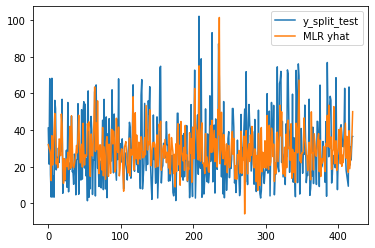

In [16]:
# write the function for the MLR model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def build_mlr_model(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    mse = mean_squared_error(y_test, yhat)
    print('MSE: %.5f' % mse)
    rmse = sqrt(mse)
    print('RMSE: %.5f' % rmse)
    # R2 score
    r2 = r2_score(y_test, yhat)
    print('R2: %.5f' % r2)
    return model, yhat

# build the MLR model
mlr_model, mlr_yhat = build_mlr_model(X_train, y_train, X_test, y_test)

# plot yhat and y_split_test
plt.plot(y_test, label='y_split_test')
plt.plot(mlr_yhat, label='MLR yhat')
plt.legend()


MSE: 158.15804
RMSE: 12.57609
R2: 0.55830


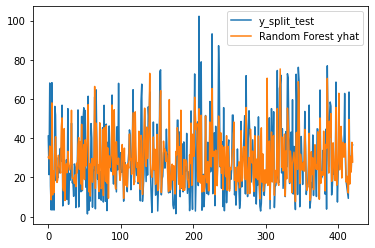

In [18]:

# write the function for the Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def build_rf_model(X_train, y_train, X_test, y_test):
    model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    mse = mean_squared_error(y_test, yhat)
    print('MSE: %.5f' % mse)
    rmse = sqrt(mse)
    print('RMSE: %.5f' % rmse)
    # R2 score
    r2 = r2_score(y_test, yhat)
    print('R2: %.5f' % r2)
    return model, yhat

# build the Random Forest model
rf_model, rf_yhat = build_rf_model(X_train, y_train, X_test, y_test)

# plot yhat and y_split_test
plt.plot(y_test, label='y_split_test')
plt.plot(rf_yhat, label='Random Forest yhat')
plt.legend()
